In [27]:
import numpy as np
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

### Import data and create pandas DataFrame for easier operations

In [2]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(data=iris['data'], columns=['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
from sklearn.model_selection import train_test_split

### Spliting the data into train and test split

In [5]:
# We are going to predict values based on two parameters 'petal length' and 'petal width' that's  why we are using
# slicing when assign X
X, y = df_iris.iloc[:, 2:4], iris['target']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

### Scaling the data using StandardScaler

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [9]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [10]:
from sklearn.linear_model import Perceptron

### Creating perceptron and setting learning rate (eta0) for best performance

In [17]:
percep = Perceptron(eta0=1, random_state=1)

In [18]:
percep.fit(X_train_std, y_train)

Perceptron(eta0=1, random_state=1)

In [19]:
y_pred = percep.predict(X_test_std) 
print(f'Accuracy of the model is: {((percep.predict(X_test_std) == y_test).sum()/len(y_pred))*100: .3f}%')

Accuracy of the model is:  88.889%


### Looking for the best learning rate

In [23]:
def epoch(number):
    print(f'Accuracy of the model for learning\
 rate={number} is:{((percep.predict(X_test_std) == y_test).sum()/len(y_pred))*100: .3f}%')
alfa = 100
for _ in range(7):
    percep = Perceptron(eta0=alfa, random_state=1)
    percep.fit(X_train_std, y_train)
    y_pred = percep.predict(X_test_std)
    epoch(alfa)
    alfa /= 10

Accuracy of the model for learning rate=100 is: 88.889%
Accuracy of the model for learning rate=10.0 is: 88.889%
Accuracy of the model for learning rate=1.0 is: 88.889%
Accuracy of the model for learning rate=0.1 is: 97.778%
Accuracy of the model for learning rate=0.01 is: 95.556%
Accuracy of the model for learning rate=0.001 is: 95.556%
Accuracy of the model for learning rate=0.0001 is: 95.556%


In [24]:
# As we can see best accuracy comes with learning rate set to 0.1

In [48]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    plt.figure(figsize=(15,7), dpi=200)
#     cmap = *colors[:len(np.unique(y))]

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3,cmap='coolwarm')
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')

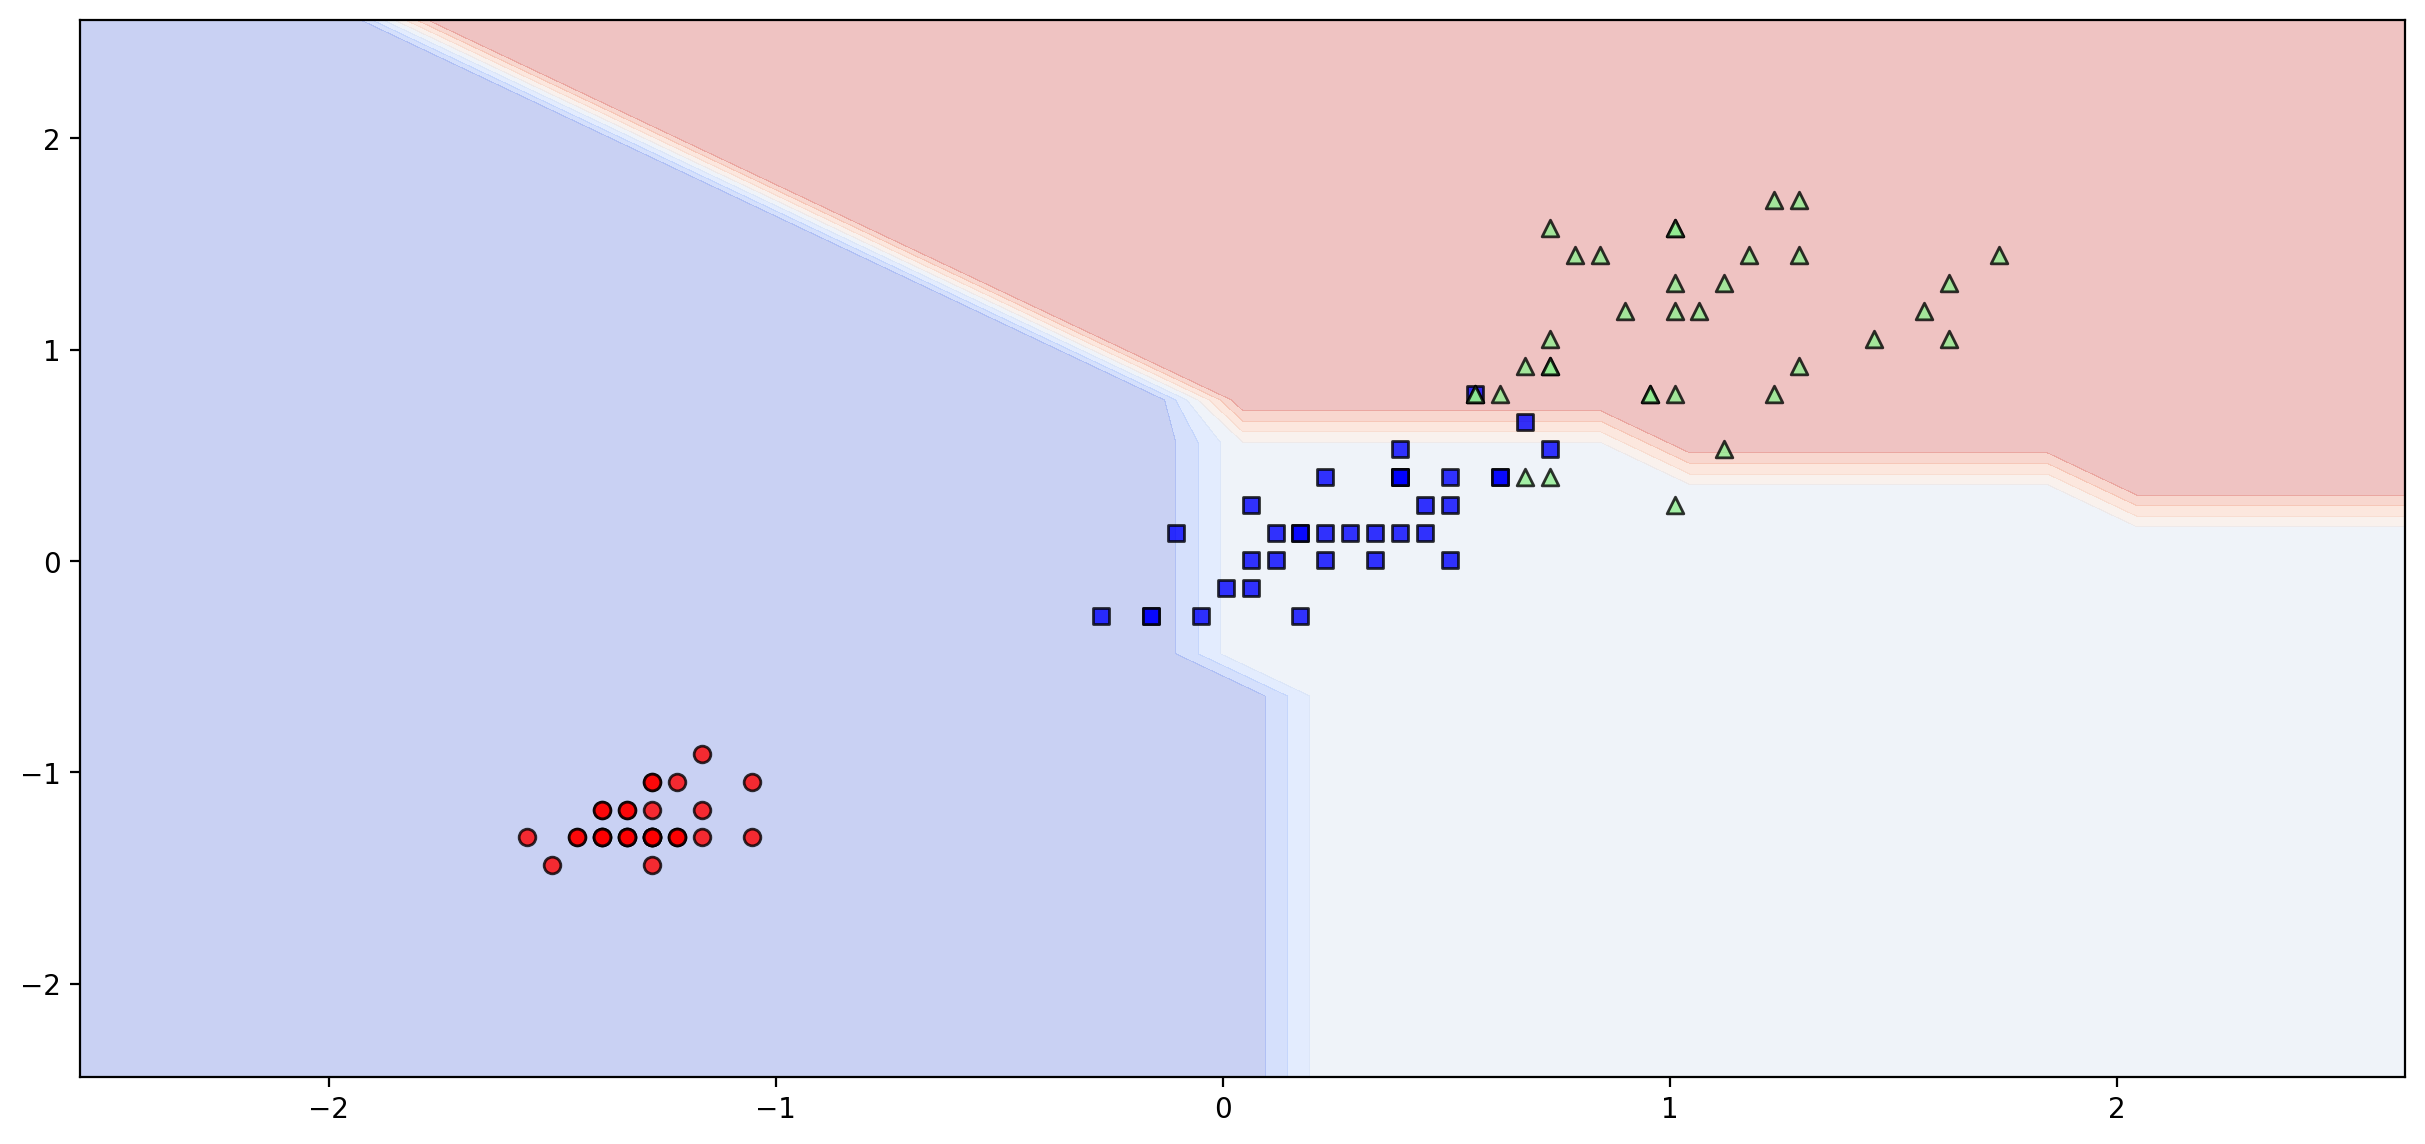

In [49]:
plot_decision_regions(X_train_std, y_train, percep, resolution=0.2)